In [3]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import random_projection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# loading minst data

In [4]:
train=pd.read_csv("train.csv")

In [5]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
train.shape

(6304, 785)

In [7]:
train.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,6304.000000,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,6304.0,...,6303.000000,6303.000000,6303.000000,6303.0,6303.0,6303.0,6303.0,6303.0,6303.0,6303.0
mean,4.440355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.139616,0.142313,0.026971,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,2.885613,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.100344,5.531528,1.675680,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,253.000000,253.000000,130.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
train.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    1
pixel780    1
pixel781    1
pixel782    1
pixel783    1
Length: 785, dtype: int64

In [9]:
train.fillna(0,inplace=True)

In [10]:
y = train['label']
x = train.drop("label",axis=1)

In [11]:
x.iloc[0].values.reshape(28,28)


array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 188., 255.,
         94.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [12]:
def show_images(num_images):
    for n in range(0,num_images):
        plt.subplot(5,5,n+1)
        plt.imshow(x.iloc[n].values.reshape(28,28))#cmap means how the imgae to be presented
        plt.xticks([]) #removes numbered labels on x-axis
        plt.yticks([]) 

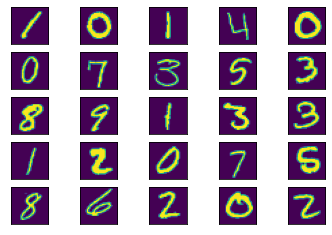

In [13]:
show_images(25)

In [14]:
y.unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

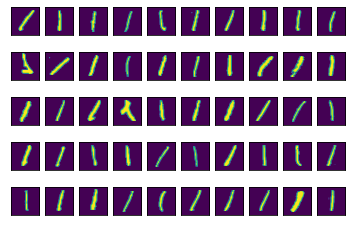

In [15]:
#def show_images by digit(digit):
digit=1
if digit in list(range(10)):
    indices=np.where(y==digit)#extract indecies where y==1
    for d in range(0,50):
        plt.subplot(5,10,d+1)
        data=x.iloc[indices[0][d]].values.reshape(28,28)
        plt.imshow(data)
        plt.xticks([])
        plt.yticks([])
else:
    print("number doesn't exist")

In [25]:
def fit_random_forest_classifier_with_plot(X, y):

    #First let's create training and testing data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

    #We could grid search and tune, but let's just fit a simple model to see how it does
    #instantiate
    clf = RandomForestClassifier(n_estimators=100, max_depth=None)

    #fit
    clf.fit(X_train, y_train)

    #predict
    y_preds = clf.predict(X_test)

    #score
    mat = confusion_matrix(y_test, y_preds)
    print(mat)
 #   print(sns.heatmap(mat, annot=True, cmap='bwr', linewidths=.5))
    acc = accuracy_score(y_test, y_preds)
    print(acc)
    return acc
    
fit_random_forest_classifier_with_plot(x, y)

[[201   1   0   0   0   0   7   0   0   0]
 [  0 235   3   0   0   1   1   2   1   0]
 [  1   4 216   0   1   0   1   4   0   1]
 [  4   0   4 171   0   4   0   1   4   3]
 [  0   0   0   0 169   0   4   1   0   4]
 [  2   1   0   5   1 171   4   0   1   1]
 [  0   0   1   0   1   2 207   0   0   0]
 [  1   0   7   0   4   0   0 204   3   6]
 [  0   1   2   6   1   4   0   0 186   2]
 [  2   1   1   2  11   1   0   1   5 184]]
0.9341662662181643


0.9341662662181643

## Try Random Projection

In [17]:
from sklearn.random_projection import GaussianRandomProjection,SparseRandomProjection

In [18]:
rp=SparseRandomProjection(eps=0.5)#n_components='auto' or eps=''

In [19]:
x_rp=rp.fit_transform(x)

In [20]:
x

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6299,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6300,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6301,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6302,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
x_rp.shape

(6304, 419)

In [26]:
fit_random_forest_classifier_with_plot(x_rp, y)

[[199   0   1   0   0   1   7   0   0   1]
 [  0 234   3   0   0   2   1   1   2   0]
 [  2   3 210   0   2   0   2   5   4   0]
 [  4   0   7 163   0   9   1   2   3   2]
 [  1   0   1   0 167   0   3   0   0   6]
 [  2   2   0   8   5 163   3   0   1   2]
 [  4   0   2   0   2   3 200   0   0   0]
 [  1   2   8   0   5   0   0 203   1   5]
 [  0   1   3  11   3   7   0   0 175   2]
 [  4   0   0   2  17   1   0  12   3 169]]
0.9048534358481499


0.9048534358481499

## try different values of Epsilon


In [31]:
for ep in np.arange(0.5,1,0.2):
    rp=SparseRandomProjection(eps=ep)
    x_rp=rp.fit_transform(x)
    acc=fit_random_forest_classifier_with_plot(x_rp, y)
    print("With epsilon = {:.2f}, the transformed data has {} components, a random forest acheived an accuracy of {}.".format(ep, x_rp.shape[1], acc))

[[193   0   1   0   0   3   9   0   2   1]
 [  0 235   2   0   0   1   1   1   3   0]
 [  3   3 208   0   2   1   4   4   2   1]
 [  2   0   7 166   1   7   1   2   4   1]
 [  0   0   0   0 166   1   4   0   0   7]
 [  2   1   0  10   2 162   4   0   4   1]
 [  5   1   2   0   0   3 199   0   0   1]
 [  1   2   5   2   5   0   1 203   1   5]
 [  1   2   3  12   0   7   1   2 174   0]
 [  4   1   0   2  17   2   0   6   2 174]]
0.9034118212397886
With epsilon = 0.50, the transformed data has 419 components, a random forest acheived an accuracy of 0.9034118212397886.
[[196   0   1   0   1   2   8   0   1   0]
 [  0 235   3   0   0   0   1   0   2   2]
 [  6   4 206   0   2   0   2   4   4   0]
 [  4   0   6 172   0   4   0   2   2   1]
 [  2   0   0   0 164   0   3   1   1   7]
 [  3   0   1  14   3 157   3   1   3   1]
 [  2   0   2   1   4   2 198   1   1   0]
 [  1   1   6   1   7   0   1 199   1   8]
 [  2   1   1   6   3   7   2   1 175   4]
 [  2   1   0   2  13   1   0   9   5 175

It is obvious that the `higher` the value of the `epsilon` the `lower` number of components we get

In [32]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim

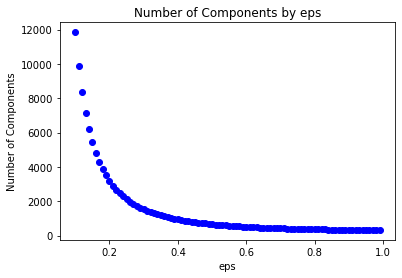

In [34]:
# Calulate the number of components with varying eps
eps=np.arange(0.1,1,0.01)
n_comp = johnson_lindenstrauss_min_dim(n_samples=1e6, eps=eps)

plt.plot(eps, n_comp, 'bo');
plt.xlabel('eps');
plt.ylabel('Number of Components');
plt.title('Number of Components by eps');

## specifying number of components

In [39]:
x_samples,x_comps=x.shape
print("The orignial data has {} samples with dimension {}.".format(x_samples, x_comps))

The orignial data has 6304 samples with dimension 784.


In [41]:
n_components = 30

rp = SparseRandomProjection(n_components=n_components)
x_rp = rp.fit_transform(x)